In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

Wed Jun 22 15:56:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# clone darknet repository
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15424, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 15424 (delta 0), reused 1 (delta 0), pack-reused 15423
Receiving objects: 100% (15424/15424), 14.03 MiB | 21.56 MiB/s, done.
Resolving deltas: 100% (10365/10365), done.


In [ ]:
!apt install gcc-5 g++-5 -y
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++-5 is already the newest version (5.5.0-12ubuntu1).
gcc-5 is already the newest version (5.5.0-12ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
ln: failed to create symbolic link '/usr/local/cuda/bin/gcc': File exists
ln: failed to create symbolic link '/usr/local/cuda/bin/g++': File exists


In [ ]:
!pwd

/content/darknet


In [ ]:
%cd darknet

/content/darknet/darknet


In [ ]:
# go to the darknet folder, edit and remake Makefiles of GPU and OPENCV
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1444:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^
./src/image_opencv.cpp:1420:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb_res = cv::create

In [ ]:
# get yolov3 weights

!wget https://pjreddie.com/media/files/yolov3.weights
!chmod a+x ./darknet

--2022-06-22 15:57:35--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  69.5MB/s    in 3.9s    

2022-06-22 15:57:39 (60.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!pwd

/content/darknet/darknet


In [ ]:
!apt install ffmpeg libopencv-dev libgtk-3-dev python-numpy python3-numpy libdc1394-22 libdc1394-22-dev libjpeg-dev libtiff5-dev libavcodec-dev libavformat-dev libswscale-dev libxine2-dev libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev libv4l-dev libtbb-dev qtbase5-dev libfaac-dev libmp3lame-dev libopencore-amrnb-dev libopencore-amrwb-dev libtheora-dev libvorbis-dev libxvidcore-dev x264 v4l-utils unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libmp3lame-dev is already the newest version (3.100-2).
libtheora-dev is already the newest version (1.1.1+dfsg.1-14).
libv4l-dev is already the newest version (1.14.2-1).
libvorbis-dev is already the newest version (1.3.5-4.2).
python-numpy is already the newest version (1:1.13.3-2ubuntu1).
python3-numpy is already the newest version (1:1.13.3-2ubuntu1).
libdc1394-22 is already the newest version (2.2.5-1).
libdc1394-22-dev is already the newest version (2.2.5-1).
libopencore-amrnb-dev is already the newest version (0.1.3-2.1).
libopencore-amrwb-dev is already the newest version (0.1.3-2.1).
libtbb-dev is already the newest version (2017~U7-8).
libxine2-dev is already the newest version (1.2.8-2build2).
libxvidcore-dev is already the newest version (2:1.3.5-1).
v4l-utils is already the newest version (1.14.2-1).
x264 is already the ne

In [ ]:
def count_objects(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    blur = cv2.GaussianBlur(gray, (11, 11), 0)
    canny = cv2.Canny(blur, 30, 150, 3)
    dilated = cv2.dilate(canny, (1, 1), iterations=0)
    
    (cnt, hierarchy) = cv2.findContours(
        dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    return len(cnt)

448
The frame with most number of objects is at timestamp 10000.0.jpg with 102 objects.


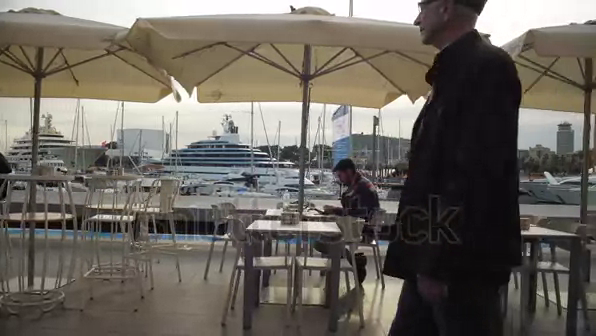

In [ ]:
from google.colab.patches import cv2_imshow

vidcap = cv2.VideoCapture('/content/drive/My Drive/test3.webm')
success = 1
count = 0
temp = 0

while success:
    success,image = vidcap.read()
    if success:
        name = str(vidcap.get(cv2.CAP_PROP_POS_MSEC)) + '.jpg' 
        cv2.imwrite(name, image)
        num_of_objects = count_objects(image)
        if temp < num_of_objects:
            max = [name, image, num_of_objects]
            temp = num_of_objects

        count += 1
print(count)
print(f'The frame with most number of objects is at timestamp {max[0]} with {max[-1]} objects.')
cv2_imshow(max[1])
img = cv2.imread(image)

In [ ]:
max[0]

'10000.0.jpg'

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights '10000.0.jpg'

 CUDA-version: 11010 (11020), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 1

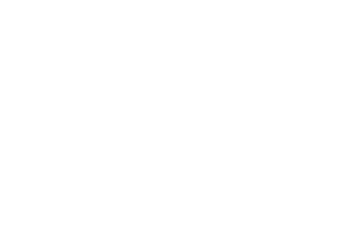

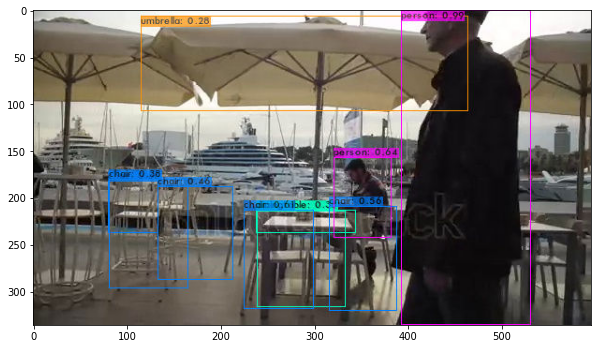

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig, ax = plt.subplots()
ax.tick_params(labelbottom = "off", bottom = "off")
ax.tick_params(labelleft = "off", left = "off")
ax.set_xticklabels([])
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
    image = cv2.imread(file)
    count_objects(image)
    show_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(show_image)